# &#x1F4D1; &nbsp; Scikit-Learn Cookbook
<h2 style="color:royalblue; font-family:Ewert; font-size:150%;" class="font-effect-3d">Code Library, Style and Links</h2>
  
<span>&#x1F310; &nbsp;</span> [DOMINO. Fitting Gaussian Process Models in Python](https://blog.dominodatalab.com/fitting-gaussian-process-models-python/)

<span>&#x1F310; &nbsp;</span> [Feature Selection For Machine Learning in Python](https://machinelearningmastery.com/feature-selection-machine-learning-python/)

<span>&#x1F310; &nbsp;</span> [Principal Component Analysis in 3 Simple Steps](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d|ice|');
body {background-color: gainsboro;} 
a {color: royalblue; font-family: 'Roboto';} 
h1 {color: slategray; font-family: 'Ewert'; text-shadow: 4px 4px 4px #aaa;} 
h3, h4 {color: darkslategray; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;}
span {font-family:'Roboto'; color:black; text-shadow: 4px 4px 4px #aaa;}
div.output_area pre{font-family:'Roboto'; font-size:110%; color: royalblue;}    
</style>

In [122]:
style_dict = {'background-color':'gainsboro', 'color':'royalblue', 'border-color': 'white', 'font-family':'Roboto'}

In [72]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

import numpy as np 
import pandas as pd 
import seaborn as sns
import scipy as sp

import os
import h5py

import matplotlib.pylab as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [42]:
from sklearn import datasets, preprocessing

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, RFE

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

In [89]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression

from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier
from sklearn.gaussian_process.kernels import WhiteKernel, RationalQuadratic, RBF

from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.isotonic import IsotonicRegression

In [50]:
from sklearn import cluster, mixture, manifold, dummy, linear_model, svm

In [61]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import accuracy_score, hamming_loss, classification_report

In [26]:
from sklearn.neural_network import MLPClassifier, BernoulliRBM, MLPRegressor

In [28]:
regressor_list = []
regressor_names = []
reg_datasets = []

r2_train, r2_test = [], []
ev_train, ev_test = [], []

mse_train, mse_test = [], []
mae_train, mae_test = [], []

mdae_train, mdae_test = [], []

In [29]:
def regressor_fit_score(regressor, regressor_name, dataset, x_train, x_test, y_train, y_test):
    regressor_list.append(str(regressor))
    regressor_names.append(str(regressor_name))
    reg_datasets.append(str(dataset))
    
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_reg_train = reg.predict(x_train)
    y_reg_test = reg.predict(x_test)
    
    r2_reg_train = round(r2_score(y_train, y_reg_train), 4)
    r2_train.append(r2_reg_train)
    r2_reg_test = round(r2_score(y_test, y_reg_test), 4)
    r2_test.append(r2_reg_test)
    
    ev_reg_train = round(explained_variance_score(y_train, y_reg_train), 4)
    ev_train.append(ev_reg_train)
    ev_reg_test = round(explained_variance_score(y_test, y_reg_test), 4)
    ev_test.append(ev_reg_test)
    
    mse_reg_train = round(mean_squared_error(y_train, y_reg_train), 4)
    mse_train.append(mse_reg_train)
    mse_reg_test = round(mean_squared_error(y_test, y_reg_test), 4)
    mse_test.append(mse_reg_test)
    
    mae_reg_train = round(mean_absolute_error(y_train, y_reg_train), 4)
    mae_train.append(mae_reg_train)
    mae_reg_test = round(mean_absolute_error(y_test, y_reg_test), 4)
    mae_test.append(mae_reg_test)
    
    mdae_reg_train = round(median_absolute_error(y_train, y_reg_train), 4)
    mdae_train.append(mdae_reg_train)
    mdae_reg_test = round(median_absolute_error(y_test, y_reg_test), 4)
    mdae_test.append(mdae_reg_test)
    
    return [y_reg_train, y_reg_test, mdae_reg_train, mdae_reg_test,
            r2_reg_train, r2_reg_test, ev_reg_train, ev_reg_test,
            mse_reg_train, mse_reg_test, mae_reg_train, mae_reg_test]

In [30]:
def get_regressor_results():
    df_results = pd.DataFrame({'regressor' : regressor_list,
                               'regressor_name': regressor_names,
                               'dataset': reg_datasets,
                               'r2_train': r2_train, 'r2_test': r2_test,
                               'ev_train': ev_train, 'ev_test': ev_test,
                               'mse_train': mse_train, 'mse_test': mse_test,
                               'mae_train': mae_train, 'mae_test': mae_test,
                               'mdae_train': mdae_train, 'mdae_test': mdae_test})
    
    df_list = ['regressor_name', 'r2_train', 'r2_test', 'ev_train', 'ev_test',
               'mse_train', 'mse_test', 'mae_train', 'mae_test', 'mdae_train', 'mdae_test']
               
    return df_results, df_results[df_list]

---
<h2 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Data</h2>
### internal datasets
[Dataset loading utilities](http://scikit-learn.org/stable/datasets/index.html#datasets)

In [4]:
boston = datasets.load_boston()
housing = datasets.fetch_california_housing()
digits = datasets.load_digits()
wine = datasets.load_wine()

X1, y1 = boston.data, boston.target
X2, y2 = housing.data, housing.target
X3, y3 = digits.data, digits.target
X4, y4 = wine.data, wine.target

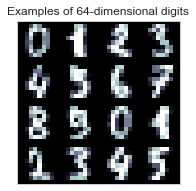

In [5]:
## Image examples
n_img_per_row = 4
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X3[i * n_img_per_row + j].reshape((8, 8))

plt.figure(figsize=(3, 3))
plt.imshow(img, cmap=plt.cm.bone)

plt.xticks([])
plt.yticks([])
plt.title('Examples of 64-dimensional digits');

### artificial datasets

In [6]:
# 5000x3 matrix, 3 features (2 responsible for targets), 1 target, 0.97 - the bias factor
regression_data = datasets.make_regression(5000, 3, 2, 1, 0.97)
X5, y5 = regression_data[0], regression_data[1]

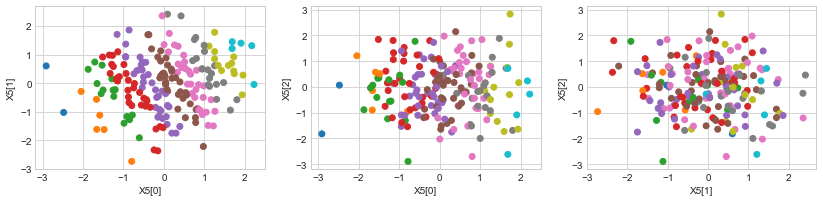

In [7]:
plt.figure(1, figsize=(14,3))
plt.subplot(131); plt.scatter(X5[:200, 0], X5[:200, 1], c=y5[:200], cmap=plt.cm.tab10)
plt.xlabel('X5[0]'); plt.ylabel('X5[1]')
plt.subplot(132); plt.scatter(X5[:200, 0], X5[:200, 2], c=y5[:200], cmap=plt.cm.tab10)
plt.xlabel('X5[0]'); plt.ylabel('X5[2]')
plt.subplot(133); plt.scatter(X5[:200, 1], X5[:200, 2], c=y5[:200], cmap=plt.cm.tab10)
plt.xlabel('X5[1]'); plt.ylabel('X5[2]'); 

In [8]:
# 5000x10 matrix, 10 features (8 - responsible for targets), 2 targets, 
# 0.7 - the bias factor, 10.0 - the noise
regression_data = datasets.make_regression(5000, 10, 8, 2, 0.7, noise=10.0)
X6, y6 = regression_data[0], regression_data[1]

In [9]:
# Gaussian blobs for clustering, 1000 data points, 4 clusters
blobs_data = datasets.make_blobs(n_samples=1000, 
                                 centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]], 
                                 cluster_std=0.5)
X7, y7= blobs_data[0], blobs_data[1]

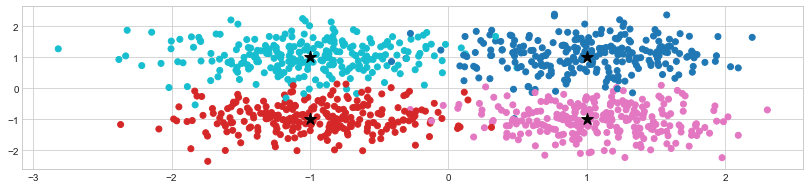

In [10]:
plt.figure(figsize=(14,3))
plt.scatter(X7[:, 0], X7[:, 1], c=y7, cmap=plt.cm.tab10)
plt.scatter([1,-1,1,-1], [1,-1,-1,1], c='black', marker='*', s=150);

In [11]:
# 5000 data points, 2 features, 1 target with 3 labels
X8, y8 = datasets.make_multilabel_classification(n_classes=3, n_samples=5000, n_features=2)

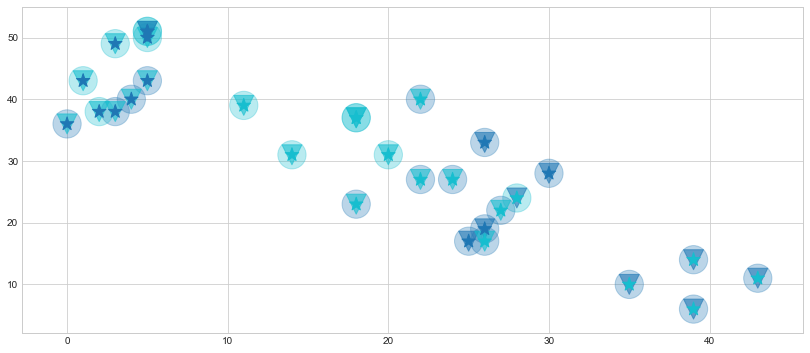

In [12]:
plt.figure(figsize=(14,6))
plt.scatter(X8[:30, 0], X8[:30, 1], c=y8[:30, 0],  marker='o', alpha=0.3, cmap=plt.cm.tab10, s=800)
plt.scatter(X8[:30, 0], X8[:30, 1], c=y8[:30, 1], marker='v', alpha=0.6, cmap=plt.cm.tab10, s=400)
plt.scatter(X8[:30, 0], X8[:30, 1], c=y8[:30, 2], marker='*', cmap=plt.cm.tab10, s=200);

### external datasets

In [13]:
# Classification. Handwritten letters
# Read the csv files
data1 = pd.read_csv("../deep_learning_projects/DL_PP2/data/letters.csv")
letters1 = data1['letter']
data2 = pd.read_csv("../deep_learning_projects/DL_PP2/data2/letters2.csv")
letters2 = data2['letter']
data3 = pd.read_csv("../deep_learning_projects/DL_PP2/data3/letters3.csv")
letters3 = data3['letter']
# Concatenate series
letters = pd.concat((letters1, letters2), axis=0, ignore_index=True)
letters = pd.concat((letters, letters3), axis=0, ignore_index=True)
# Read the h5 file
f = h5py.File('../deep_learning_projects/DL_PP2/LetterColorImages_123.h5', 'r')
keys = list(f.keys())
# Create tensors and targets
backgrounds = np.array(f[keys[0]])
letter_images = np.array(f[keys[1]]) / 255
targets = np.array(f[keys[2]])

Label:  ж


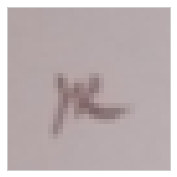

In [14]:
# Read and display an example
print('Label: ', letters[3000])
plt.figure(figsize=(3,3)); plt.xticks([]); plt.yticks([])
plt.imshow(letter_images[3000]);

In [15]:
# Classification. Brand & Products
# Read the h5 file
f = h5py.File('../deep_learning_projects/DL_PP4/StyleColorImages.h5', 'r')
keys = list(f.keys())
# Create features and targets
brands = np.array(f[keys[0]])
style_images = np.array(f[keys[1]]) / 255
products = np.array(f[keys[2]])

Brand:  3 
Product: 2


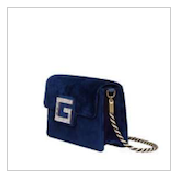

In [16]:
# Read and display an example
print('Brand: ', brands[1000], '\nProduct:', products[1000])
plt.figure(figsize=(3,3)); plt.xticks([]); plt.yticks([])
plt.imshow(style_images[1000]);

---
<h2 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Extraction and Preprocessing</h2>

### extraction

In [17]:
# Basic examples
temperature = [{'city': 'Hanoi', 'temperature': 33.}, {'city': 'Frankfurt', 'temperature': 16.},
               {'city': 'Houston', 'temperature': 28.}, {'city': 'Riyadh', 'temperature': 38.},
               {'city': 'Barcelona', 'temperature': 17.}, {'city': 'Ankara', 'temperature': 27.}]

corpus = ['Have you already set your goals for the New Year?', 
          'Do you want to lose ten kilos, run a marathon or speak fluent English?', 
          'Some experts believe that you need systems, not goals.', 
          'A system is something you do on a regular basis. ',
          'This means focusing on what you can control (your actions) rather than what you can’t.',
          'For example, do not focus on losing ten kilos.',
          'Focus on shopping for healthy food and cooking something light every day.',
          'Do not focus on the marathon.',
          'Focus on the training schedule.',
          'Invent a system to improve your English, one step at a time.',
          'Good luck!']

In [18]:
# Extraction from dictionaries
d_vectorizer = DictVectorizer()
temperature_features = d_vectorizer.fit_transform(temperature).toarray().astype('int16')
print(temperature_features, '\n')
print(d_vectorizer.get_feature_names())

[[ 0  0  0  1  0  0 33]
 [ 0  0  1  0  0  0 16]
 [ 0  0  0  0  1  0 28]
 [ 0  0  0  0  0  1 38]
 [ 0  1  0  0  0  0 17]
 [ 1  0  0  0  0  0 27]] 

['city=Ankara', 'city=Barcelona', 'city=Frankfurt', 'city=Hanoi', 'city=Houston', 'city=Riyadh', 'temperature']


In [19]:
# Extraction from texts
c_vectorizer = CountVectorizer(min_df=1)
corpus_features = c_vectorizer.fit_transform(corpus)
print(corpus_features[0], '\n')
print(corpus_features.toarray().astype('int16'), '\n')
print(c_vectorizer.get_feature_names())

  (0, 62)	1
  (0, 35)	1
  (0, 55)	1
  (0, 19)	1
  (0, 20)	1
  (0, 64)	1
  (0, 44)	1
  (0, 1)	1
  (0, 63)	1
  (0, 22)	1 

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
  0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 2 0 2 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
  1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0

In [20]:
# Preprocessing and tokenization
c_analyzer = c_vectorizer.build_analyzer()
c_analyzer(corpus[0])

['have', 'you', 'already', 'set', 'your', 'goals', 'for', 'the', 'new', 'year']

### scaling

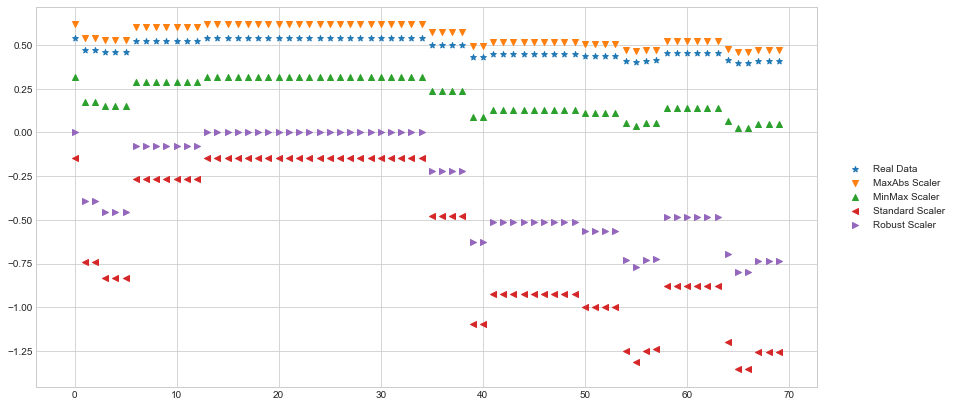

In [36]:
# Applying scalers
X1_minmax = preprocessing.MinMaxScaler().fit_transform(X1)
X1_maxabs = preprocessing.MaxAbsScaler().fit_transform(X1)
X1_stscaled = preprocessing.StandardScaler().fit_transform(X1)
X1_rbscaled = preprocessing.RobustScaler().fit_transform(X1)

n=70; plt.figure(figsize=(14, 7))
plt.scatter(range(n), X1[:n, 4], marker='*', label='Real Data')
plt.scatter(range(n), X1_maxabs[:n, 4], marker='v', label='MaxAbs Scaler')
plt.scatter(range(n), X1_minmax[:n, 4], marker='^', label='MinMax Scaler')
plt.scatter(range(n), X1_stscaled[:n, 4], marker='<', label='Standard Scaler')
plt.scatter(range(n), X1_rbscaled[:n, 4], marker='>', label='Robust Scaler')

plt.legend(loc=10, bbox_to_anchor=(1.1,0.5));

### one-hot encoding

In [37]:
# Encoding categorical variables 
encoder = preprocessing.OneHotEncoder()
encoder.fit(brands.reshape(-1, 1))
cat_brands = encoder.transform(brands.reshape(-1, 1)).toarray().astype('int16')

encoder = preprocessing.OneHotEncoder()
encoder.fit(products.reshape(-1, 1))
cat_products = encoder.transform(products.reshape(-1, 1)).toarray().astype('int16')

encoder = preprocessing.OneHotEncoder()
encoder.fit(backgrounds.reshape(-1, 1))
cat_backgrounds = encoder.transform(backgrounds.reshape(-1, 1)).toarray().astype('int16')

encoder = preprocessing.OneHotEncoder()
encoder.fit(targets.reshape(-1, 1))
cat_targets = encoder.transform(targets.reshape(-1, 1)).toarray().astype('int16')

print(targets[:3])
print(cat_targets[:3])

[1 1 1]
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


### imputation of missing values

In [38]:
# Basic examples
x1_train = [[0, 17], [np.nan, 4], [1, 7], [3, np.nan], [10, 25]]
x1_test = [[np.nan, 5], [8, np.nan], [4, 6]]

# Mean
mean_imputer = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
mean_imputer.fit(x1_train)
mean_imputer.transform(x1_test)

array([[ 3.5 ,  5.  ],
       [ 8.  , 13.25],
       [ 4.  ,  6.  ]])

In [39]:
# Median
median_imputer = preprocessing.Imputer(missing_values='NaN', strategy='median', axis=0)
median_imputer.fit(x1_train)
median_imputer.transform(x1_test)

array([[ 2.,  5.],
       [ 8., 12.],
       [ 4.,  6.]])

In [41]:
# Custom transformers
log_transformer = preprocessing.FunctionTransformer(np.log1p)
x1_log_train = log_transformer.transform(median_imputer.transform(x1_train))
x1_log_test = log_transformer.transform(median_imputer.transform(x1_test))
print(x1_log_train,'\n\n', x1_log_test)

[[0.         2.89037176]
 [1.09861229 1.60943791]
 [0.69314718 2.07944154]
 [1.38629436 2.56494936]
 [2.39789527 3.25809654]] 

 [[1.09861229 1.79175947]
 [2.19722458 2.56494936]
 [1.60943791 1.94591015]]


### features' importance

In [45]:
# Wine Dataset & Classifiers
df_importance = pd.DataFrame(columns=range(13))

df_importance.loc[0] = AdaBoostClassifier().fit(X4, y4).feature_importances_
df_importance.loc[1] = RandomForestClassifier().fit(X4, y4).feature_importances_
df_importance.loc[2] = GradientBoostingClassifier().fit(X4, y4).feature_importances_
df_importance.loc[3]= DecisionTreeClassifier().fit(X4, y4).feature_importances_
df_importance.loc[4] = ExtraTreeClassifier().fit(X4, y4).feature_importances_

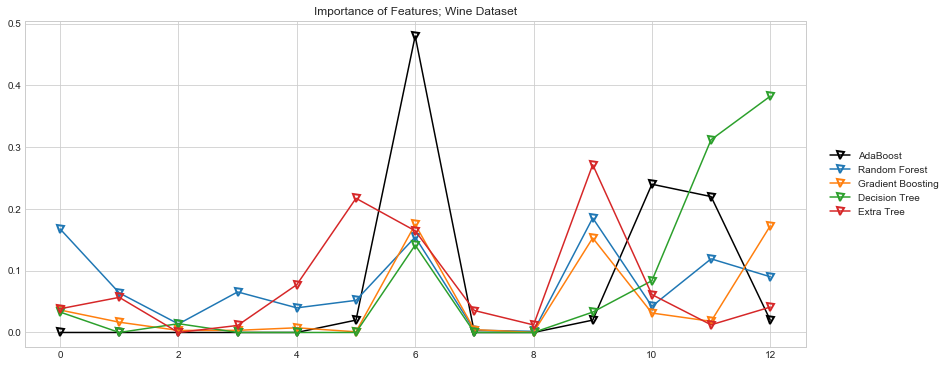

In [46]:
plt.figure(figsize = (14, 6))

plt.plot(df_importance.loc[0], '-v', color = 'black', label='AdaBoost',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(df_importance.loc[1], '-v', label='Random Forest',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(df_importance.loc[2], '-v', label='Gradient Boosting',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(df_importance.loc[3], '-v', label='Decision Tree',
        markersize=7, markerfacecolor="None", markeredgewidth=2)
plt.plot(df_importance.loc[4], '-v', label='Extra Tree',
        markersize=7, markerfacecolor="None", markeredgewidth=2)


plt.legend(loc=10, bbox_to_anchor=(1.1,0.5))
plt.title("Importance of Features; Wine Dataset");

### dimensionality reduction
Univariate Selection, Recursive Feature Elimination, Principal Component Analysis, etc.

In [48]:
# Univariate Selection; Wine Dataset
select_kbest = SelectKBest(score_func=chi2, k=4)
fit_select_kbest = select_kbest.fit(X4, y4)
features_select_kbest = fit_select_kbest.transform(X4)
np.set_printoptions(precision=4)
print(("Kbest scores: \n%a") % fit_select_kbest.scores_)
print(("Selected features: \n%a") % features_select_kbest[0:5,:])

Kbest scores: 
array([5.4455e+00, 2.8069e+01, 7.4338e-01, 2.9384e+01, 4.5026e+01,
       1.5623e+01, 6.3334e+01, 1.8155e+00, 9.3683e+00, 1.0902e+02,
       5.1825e+00, 2.3390e+01, 1.6540e+04])
Selected features: 
array([[ 127.  ,    3.06,    5.64, 1065.  ],
       [ 100.  ,    2.76,    4.38, 1050.  ],
       [ 101.  ,    3.24,    5.68, 1185.  ],
       [ 113.  ,    3.49,    7.8 , 1480.  ],
       [ 118.  ,    2.69,    4.32,  735.  ]])


In [51]:
# Recursive Feature Elimination; Wine Dataset
lr_model = linear_model.LogisticRegression()
rfe3 = RFE(lr_model, 3)
fit_rfe = rfe3.fit(X4, y4)
print(("Number of Features: %d") % fit_rfe.n_features_)
print(("Selected Features: \n%s") % fit_rfe.support_)
print(("Feature Ranking: \n%s") % fit_rfe.ranking_)

Number of Features: 3
Selected Features: 
[False False False False False False  True False False  True  True False
 False]
Feature Ranking: 
[ 9  5  2  4 10  8  1  7  6  1  1  3 11]


In [52]:
# Principal Component Analysis; Boston Dataset
pca3 = PCA(n_components=3)
fit_pca = pca3.fit(X1)

print(("Explained Variance: \n%s\n") % fit_pca.explained_variance_ratio_)
print(fit_pca.components_[0], '\n')
print(fit_pca.components_[1], '\n')
print(fit_pca.components_[2])

Explained Variance: 
[0.8058 0.1631 0.0213]

[ 2.9079e-02 -4.3590e-02  2.8331e-02 -5.5583e-05  4.4972e-04 -1.1682e-03
  8.3634e-02 -6.5617e-03  4.5006e-02  9.4975e-01  5.6002e-03 -2.9122e-01
  2.2943e-02] 

[ 5.9536e-03  1.1745e-03 -4.9488e-03 -1.0267e-04  1.8309e-06  3.6574e-04
 -5.7214e-03  3.5361e-04 -8.6182e-03 -2.9238e-01 -2.5289e-03 -9.5619e-01
  5.7670e-03] 

[-0.0116  0.6329 -0.0883 -0.001  -0.0018  0.0047 -0.7559  0.0451  0.0028
  0.0939 -0.0112 -0.0236 -0.0928]


### shuffling and splitting

In [54]:
# Boston
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 1)
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((404, 13), (102, 13), (404,), (102,))

In [55]:
# Housing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 1)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [56]:
# Digits
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 1)
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((1437, 64), (360, 64), (1437,), (360,))

In [57]:
# Wine
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state = 1)
X_train4.shape, X_test4.shape, y_train4.shape, y_test4.shape

((142, 13), (36, 13), (142,), (36,))

In [129]:
# Toy blobs
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size = 0.2, random_state = 1)
X_train7.shape, X_test7.shape, y_train7.shape, y_test7.shape

((800, 2), (200, 2), (800,), (200,))

In [58]:
# Handwritten letters
X_train9, X_test9, y_train9, y_test9 = train_test_split(letter_images, cat_targets, test_size = 0.2, random_state = 1)
X_train9.shape, X_test9.shape, y_train9.shape, y_test9.shape

((11352, 32, 32, 3), (2838, 32, 32, 3), (11352, 33), (2838, 33))

In [59]:
# Style images and brands
X_train10, X_test10, y_train10, y_test10 = train_test_split(style_images, cat_brands, test_size = 0.2, random_state = 1)
X_train10.shape, X_test10.shape, y_train10.shape, y_test10.shape

((1747, 150, 150, 3), (437, 150, 150, 3), (1747, 7), (437, 7))

In [60]:
# Style images and products
X_train11, X_test11, y_train11, y_test11 = train_test_split(style_images, cat_products, test_size = 0.2, random_state = 1)
X_train11.shape, X_test11.shape, y_train11.shape, y_test11.shape

((1747, 150, 150, 3), (437, 150, 150, 3), (1747, 10), (437, 10))

<h1 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Supervised Learning. Classification</h1>

In [124]:
classifier_list = []
classifier_names = []
clf_datasets = []

acc_train, acc_test = [], []
loss_train, loss_test = [], []

def classifier_fit_score(classifier, classifier_name, clf_dataset, x_train, x_test, y_train, y_test):
    classifier_list.append(str(classifier))
    classifier_names.append(str(classifier_name))
    clf_datasets.append(str(clf_dataset))
    
    clf = classifier
    clf.fit(x_train, y_train)
    
    y_clf_train = clf.predict(x_train)
    y_clf_test = clf.predict(x_test)
        
    acc_clf_train = round(accuracy_score(y_train, y_clf_train), 4)
    acc_train.append(acc_clf_train)
    acc_clf_test = round(accuracy_score(y_test, y_clf_test), 4)
    acc_test.append(acc_clf_test)
    
    loss_clf_train = round(hamming_loss(y_train, y_clf_train), 4)
    loss_train.append(loss_clf_train)
    loss_clf_test = round(hamming_loss(y_test, y_clf_test), 4)
    loss_test.append(loss_clf_test)
    
    return [y_clf_train, y_clf_test, acc_clf_train, acc_clf_test, loss_clf_train, loss_clf_test]

def get_classifier_results():
    df_results = pd.DataFrame({'classifier' : classifier_list,
                               'classifier_name': classifier_names,
                               'clf_dataset': clf_datasets,
                               'acc_train': acc_train, 'acc_test': acc_test,
                               'loss_train': loss_train, 'loss_test': loss_test})
               
    return df_results

df_list = ['classifier_name', 'acc_train', 'acc_test', 'loss_train', 'loss_test']

In [125]:
clf1 = linear_model.LogisticRegression()
clf2 = linear_model.LogisticRegressionCV() 
clf3 = linear_model.SGDClassifier()
clf4 = linear_model.RidgeClassifier()
clf5 = linear_model.RidgeClassifierCV()
clf6 = LinearDiscriminantAnalysis()
clf7 = QuadraticDiscriminantAnalysis()
clf8 = svm.LinearSVC()
clf9 = svm.SVC(C=10.0, kernel='poly')
clf10 = svm.NuSVC(kernel='poly')
clf11 = KNeighborsClassifier()
clf12 = RadiusNeighborsClassifier(radius=30)
clf13 = NearestCentroid()
clf14 = DecisionTreeClassifier()
clf15 = ExtraTreeClassifier()
clf16 = GaussianNB()
clf17 = BernoulliNB()
clf18 = MultinomialNB()
clf19 = BaggingClassifier()
clf20 = RandomForestClassifier()
clf21 = AdaBoostClassifier()
clf22 = GradientBoostingClassifier()
clf23 = linear_model.Perceptron()
clf24 = linear_model.PassiveAggressiveClassifier()
clf25 = GaussianProcessClassifier()
clf26 = LabelPropagation()
clf27 = LabelSpreading()

In [126]:
y_train31, y_test31 = \
classifier_fit_score(clf1, 'LogisticRegression', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train32, y_test32 = \
classifier_fit_score(clf2, 'LogisticRegressionCV', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train33, y_test33 = \
classifier_fit_score(clf3, 'SGDClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train34, y_test34 = \
classifier_fit_score(clf4, 'RidgeClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train35, y_test35 = \
classifier_fit_score(clf5, 'RidgeClassifierCV', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train36, y_test36 = \
classifier_fit_score(clf6, 'LinearDiscriminantAnalysis', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train37, y_test37 = \
classifier_fit_score(clf7, 'QuadraticDiscriminantAnalysis', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train38, y_test38 = \
classifier_fit_score(clf8, 'LinearSVC', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train39, y_test39 = \
classifier_fit_score(clf9, 'SVC', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train310, y_test310 = \
classifier_fit_score(clf10, 'NuSVC', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]

In [127]:
y_train311, y_test311 = \
classifier_fit_score(clf11, 'KNeighborsClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train312, y_test312 = \
classifier_fit_score(clf12, 'RadiusNeighborsClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train313, y_test313 = \
classifier_fit_score(clf13, 'NearestCentroid', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train314, y_test314 = \
classifier_fit_score(clf14, 'DecisionTreeClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train315, y_test315 = \
classifier_fit_score(clf15, 'ExtraTreeClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train316, y_test316 = \
classifier_fit_score(clf16, 'GaussianNB', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train317, y_test317 = \
classifier_fit_score(clf17, 'BernoulliNB', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train318, y_test318 = \
classifier_fit_score(clf18, 'MultinomialNB', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train319, y_test319 = \
classifier_fit_score(clf19, 'BaggingClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train320, y_test320 = \
classifier_fit_score(clf20, 'RandomForestClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train321, y_test321 = \
classifier_fit_score(clf21, 'AdaBoostClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train322, y_test322 = \
classifier_fit_score(clf22, 'GradientBoostingClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train323, y_test323 = \
classifier_fit_score(clf23, 'Perceptron', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]
y_train324, y_test324 = \
classifier_fit_score(clf24, 'PassiveAggressiveClassifier', 'Digits',X_train3, X_test3, y_train3, y_test3)[:2]

In [130]:
y_train725, y_test725 = \
classifier_fit_score(clf25, 'GaussianProcessClassifier', 'Toy Blobs',X_train7, X_test7, y_train7, y_test7)[:2]
y_train726, y_test726 = \
classifier_fit_score(clf26, 'LabelPropagation', 'Toy Blobs',X_train7, X_test7, y_train7, y_test7)[:2]
y_train727, y_test727 = \
classifier_fit_score(clf27, 'LabelSpreading', 'Toy Blobs', X_train7, X_test7, y_train7, y_test7)[:2]

In [ ]:
df_classifier_results  = get_classifier_results()

In [134]:
# Digits' Images 
df_classifier_results[df_list][:24].sort_values('acc_test', ascending=False)\
.style.set_properties(**style_dict)

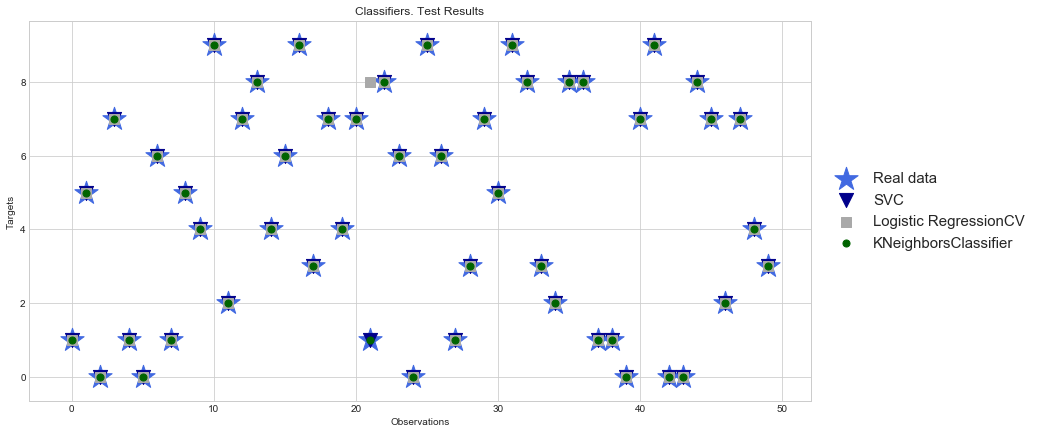

In [135]:
plt.figure(figsize=(14, 7))
n=50
x=range(n)

plt.scatter(x, y_test3[:n], marker='*', s=600, color='royalblue', label='Real data')

plt.scatter(x, y_test39[:n], marker='v', s=200, color='darkblue', label='SVC')
plt.scatter(x, y_test32[:n], marker='s', s=100, color='darkgrey', label='Logistic RegressionCV')
plt.scatter(x, y_test311[:n], marker='o', s=50, color='darkgreen', label='KNeighborsClassifier')

plt.xlabel('Observations')
plt.ylabel('Targets')
plt.title('Classifiers. Test Results')
plt.legend(loc=10, bbox_to_anchor=(1.15,0.5), fontsize=15);

In [133]:
df_classifier_results[df_list][24:].sort_values('acc_test', ascending=False)\
.style.set_properties(**style_dict)

<h1 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Supervised Learning. Regression</h1>

### *Generalized Linear Models; Boston Dataset*

In [42]:
reg1 = linear_model.LinearRegression()
reg2 = linear_model.Ridge()
reg3 = linear_model.RidgeCV()
reg4 = linear_model.Lasso()
reg5 = linear_model.LassoLarsCV()

In [43]:
y_lr_train11, y_lr_test11 = regressor_fit_score(reg1, 'LinearRegression', 'boston',
                                                X_train1, X_test1, y_train1, y_test1)[:2]

y_rr_train12, y_rr_test12 = regressor_fit_score(reg2, 'Ridge', 'boston',
                                                X_train1, X_test1, y_train1, y_test1)[:2]

y_rcvr_train13, y_rcvr_test13 = regressor_fit_score(reg3, 'RidgeCV', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

y_lsr_train14, y_lsr_test14 = regressor_fit_score(reg4, 'Lasso', 'boston',
                                                  X_train1, X_test1, y_train1, y_test1)[:2]

y_llcvr_train15, y_llcvr_test15 = regressor_fit_score(reg5, 'LassoLarsCV', 'boston',
                                                      X_train1, X_test1, y_train1, y_test1)[:2]

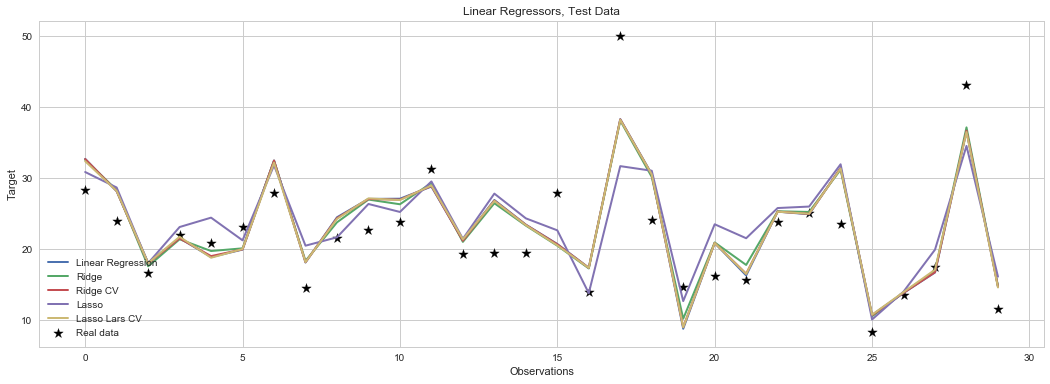

In [44]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test1[:n], marker='*', s=100, color='black', label='Real data')

plt.plot(x, y_lr_test11[:n], lw=2, label='Linear Regression')
plt.plot(x, y_rr_test12[:n], lw=2, label='Ridge')
plt.plot(x, y_rcvr_test13[:n], lw=2, label='Ridge CV')
plt.plot(x, y_lsr_test14[:n], lw=2, label='Lasso')
plt.plot(x, y_llcvr_test15[:n], lw=2, label='Lasso Lars CV')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Linear Regressors, Test Data')
plt.legend(loc=3);

In [45]:
reg6 = linear_model.RANSACRegressor()
reg7 = linear_model.BayesianRidge()
reg8 = linear_model.ARDRegression()
reg9 = linear_model.HuberRegressor()
reg10 = linear_model.TheilSenRegressor()

In [46]:
y_ranr_train16, y_ranr_test16 = regressor_fit_score(reg6, 'RANSACRegressor', 'boston',
                                                  X_train1, X_test1, y_train1, y_test1)[:2]

y_br_train17, y_br_test17 = regressor_fit_score(reg7, 'BayesianRidge', 'boston',
                                                X_train1, X_test1, y_train1, y_test1)[:2]

y_ardr_train18, y_ardr_test18 = regressor_fit_score(reg8, 'ARDRegression', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

y_hr_train19, y_hr_test19 = regressor_fit_score(reg9, 'HuberRegressor', 'boston',
                                                X_train1, X_test1, y_train1, y_test1)[:2]

y_tsr_train110, y_tsr_test110 = regressor_fit_score(reg10, 'TheilSenRegressor', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

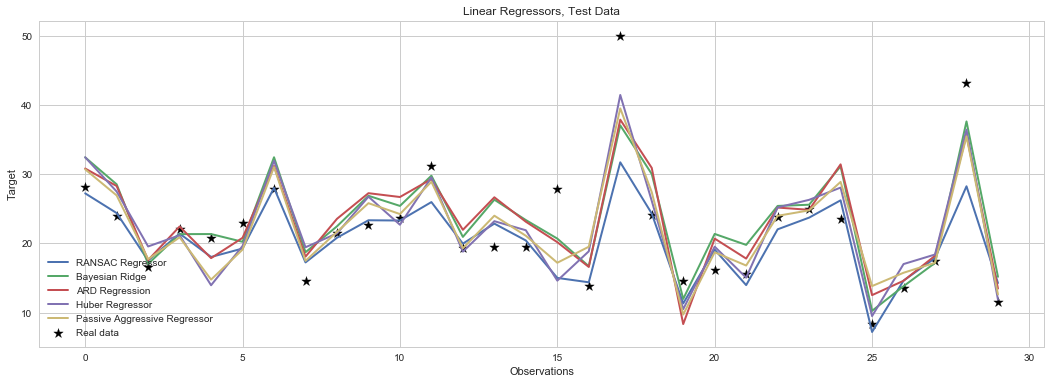

In [47]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test1[:n], marker='*', s=100, color='black', label='Real data')

plt.plot(x, y_ranr_test16[:n], lw=2, label='RANSAC Regressor')
plt.plot(x, y_br_test17[:n], lw=2, label='Bayesian Ridge')
plt.plot(x, y_ardr_test18[:n], lw=2, label='ARD Regression')
plt.plot(x, y_hr_test19[:n], lw=2, label='Huber Regressor')
plt.plot(x, y_tsr_test110[:n], lw=2, label='Passive Aggressive Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Linear Regressors, Test Data')
plt.legend(loc=3);

### *Generalized Linear Models; Toy Regression Dataset*

In [48]:
reg11 = linear_model.PassiveAggressiveRegressor()
reg12 = linear_model.ElasticNet()
reg13 = linear_model.SGDRegressor()

In [49]:
y_par_train411, y_par_test411 = regressor_fit_score(reg11, 'PassiveAggressiveRegressor', 'toy regression',
                                                   X_train4, X_test4, y_train4, y_test4)[:2]

y_enr_train412, y_enr_test412 = regressor_fit_score(reg12, 'ElasticNet', 'toy regression',
                                                X_train4, X_test4, y_train4, y_test4)[:2]

y_sgdr_train413, y_sgdr_test413 = regressor_fit_score(reg13, 'SGDRegressor', 'toy regression',
                                                      X_train4, X_test4, y_train4, y_test4)[:2]


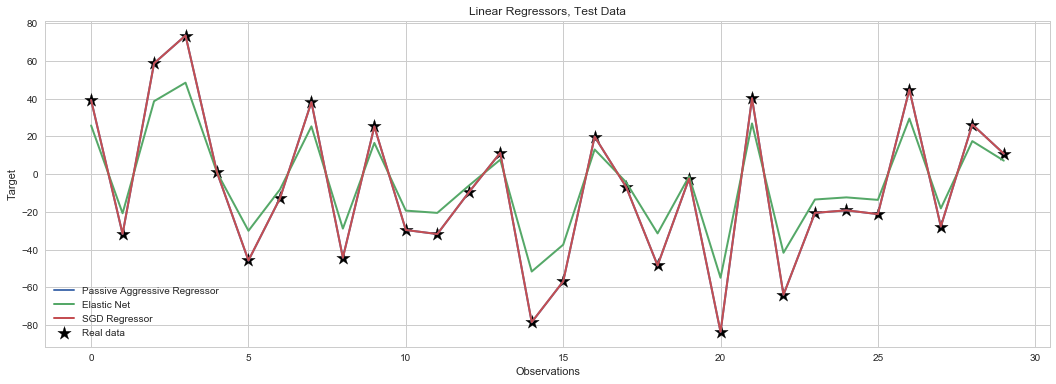

In [50]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test4[:n], marker='*', s=200, color='black', label='Real data')

plt.plot(x, y_par_test411[:n], lw=2, label='Passive Aggressive Regressor')
plt.plot(x, y_enr_test412[:n], lw=2, label='Elastic Net')
plt.plot(x, y_sgdr_test413[:n], lw=2, label='SGD Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Linear Regressors, Test Data')
plt.legend(loc=3);

### *Support Vector Machines, Nearest Neighbors; Toy Regression Dataset*

In [51]:
reg15 = svm.SVR()
reg16 = KNeighborsRegressor()
reg17 = RadiusNeighborsRegressor(radius=1.5)

In [52]:
y_svr_train415, y_svr_test415 = regressor_fit_score(reg15, 'SVR', 'toy regression',
                                                    X_train4, X_test4, y_train4, y_test4)[:2]

y_knr_train416, y_knr_test416 = regressor_fit_score(reg16, 'KNeighborsRegressor', 'toy regression',
                                                    X_train4, X_test4, y_train4, y_test4)[:2]

y_rnr_train417, y_rnr_test417 = regressor_fit_score(reg17, 'RadiusNeighborsRegressor', 'toy regression',
                                                    X_train4, X_test4, y_train4, y_test4)[:2]

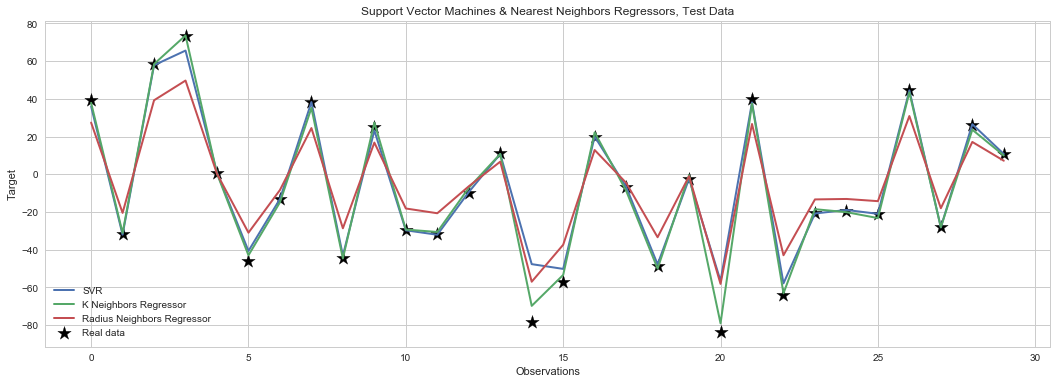

In [53]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test4[:n], marker='*', s=200, color='black', label='Real data')

plt.plot(x, y_svr_test415[:n], lw=2, label='SVR')
plt.plot(x, y_knr_test416[:n], lw=2, label='K Neighbors Regressor')
plt.plot(x, y_rnr_test417[:n], lw=2, label='Radius Neighbors Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Support Vector Machines & Nearest Neighbors Regressors, Test Data')
plt.legend(loc=3);

### *Partial Least Squares (PLS) & Tree Regressors; Boston Dataset*

In [54]:
reg19 = PLSRegression()
reg20 = DecisionTreeRegressor()
reg21 = ExtraTreeRegressor()

In [55]:
y_plsr_train119, y_plsr_test119 = regressor_fit_score(reg19, 'PLSRegression', 'boston',
                                                      X_train1, X_test1, y_train1, y_test1)[:2]

y_dtr_train120, y_dtr_test120 = regressor_fit_score(reg20, 'DecisionTreeRegressor', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

y_etr_train121, y_etr_test121 = regressor_fit_score(reg21, 'ExtraTreeRegressor', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

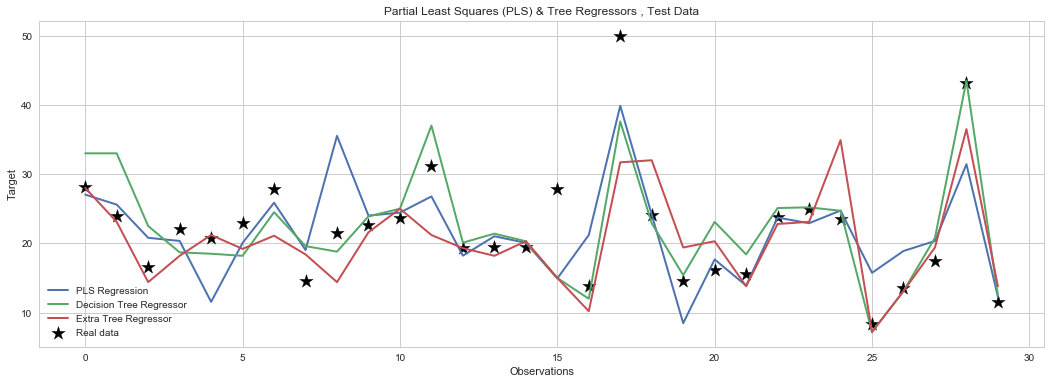

In [56]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test1[:n], marker='*', s=200, color='black', label='Real data')

plt.plot(x, y_plsr_test119[:n], lw=2, label='PLS Regression')
plt.plot(x, y_dtr_test120[:n], lw=2, label='Decision Tree Regressor')
plt.plot(x, y_etr_test121[:n], lw=2, label='Extra Tree Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Partial Least Squares (PLS) & Tree Regressors , Test Data')
plt.legend(loc=3);

### *Ensemble Methods; Boston Dataset*

In [57]:
reg22 = BaggingRegressor()
reg23 = AdaBoostRegressor()
reg24 = GradientBoostingRegressor()
reg25 = RandomForestRegressor()

In [58]:
y_br_train122, y_br_test122 = regressor_fit_score(reg22, 'BaggingRegressor', 'boston',
                                                  X_train1, X_test1, y_train1, y_test1)[:2]

y_abr_train123, y_abr_test123 = regressor_fit_score(reg23, 'AdaBoostRegressor', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

y_gbr_train124, y_gbr_test124 = regressor_fit_score(reg24, 'GradientBoostingRegressor', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

y_rfr_train125, y_rfr_test125 = regressor_fit_score(reg25, 'RandomForestRegressor', 'boston',
                                                    X_train1, X_test1, y_train1, y_test1)[:2]

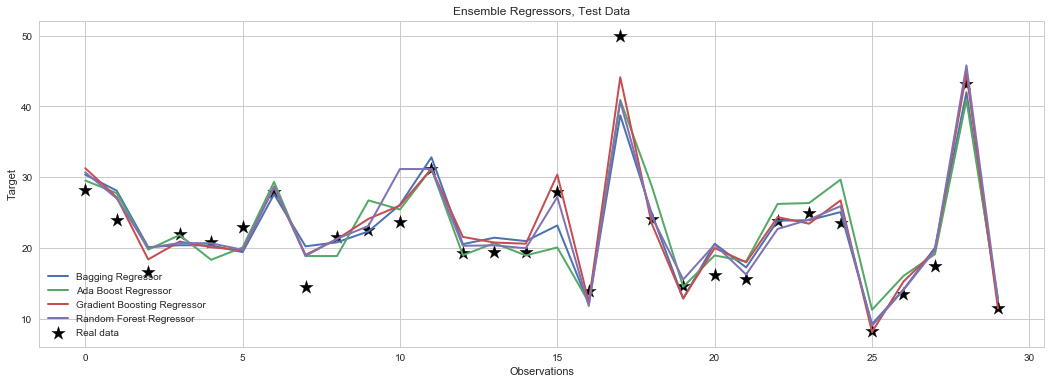

In [59]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test1[:n], marker='*', s=200, color='black', label='Real data')

plt.plot(x, y_br_test122[:n], lw=2, label='Bagging Regressor')
plt.plot(x, y_abr_test123[:n], lw=2, label='Ada Boost Regressor')
plt.plot(x, y_gbr_test124[:n], lw=2, label='Gradient Boosting Regressor')
plt.plot(x, y_rfr_test125[:n], lw=2, label='Random Forest Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Ensemble Regressors, Test Data')
plt.legend(loc=3);

 ### *Gaussian Processes; Toy Regression Dataset* 
 #### Kernels for Gaussian Processes
 - Kernel,
 - WhiteKernel,
 - ConstantKernel, 
 - RBF (Radial-basis function),
 - Matern (generalization of RBF),
 - RationalQuadratic,
 - ExpSineSquared, 
 -  DotProduct.

In [60]:
reg18 = GaussianProcessRegressor()

y_gpr_train418, y_gpr_test418 = regressor_fit_score(reg18, 'GaussianProcessRegressor', 'toy regression',
                                                    X_train4, X_test4, y_train4, y_test4)[:2]

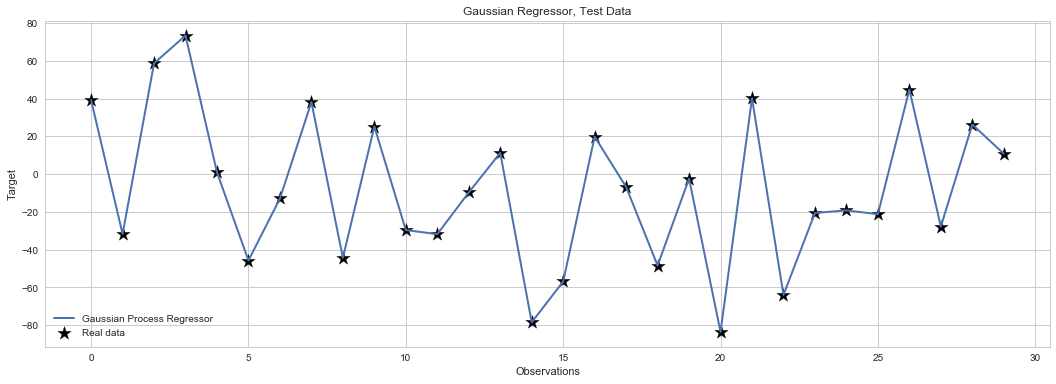

In [61]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test4[:n], marker='*', s=200, color='black', label='Real data')

plt.plot(x, y_gpr_test418[:n], lw=2, label='Gaussian Process Regressor')


plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Gaussian Regressor, Test Data')
plt.legend(loc=3);

In [62]:
df_results1, df_results1_2  = get_regressor_results()
df_results1_2.sort_values('r2_test', ascending=False)

regressor_name  r2_train  r2_test  ev_train  ev_test  \
12                SGDRegressor    1.0000   1.0000    1.0000   1.0000   
10  PassiveAggressiveRegressor    1.0000   1.0000    1.0000   1.0000   
23    GaussianProcessRegressor    1.0000   0.9999    1.0000   0.9999   
14         KNeighborsRegressor    0.9950   0.9928    0.9950   0.9928   
13                         SVR    0.9646   0.9608    0.9646   0.9608   
21   GradientBoostingRegressor    0.9780   0.9242    0.9780   0.9243   
22       RandomForestRegressor    0.9763   0.9058    0.9763   0.9063   
15    RadiusNeighborsRegressor    0.8952   0.8941    0.8952   0.8942   
19            BaggingRegressor    0.9763   0.8937    0.9763   0.8937   
11                  ElasticNet    0.8824   0.8822    0.8824   0.8823   
20           AdaBoostRegressor    0.9076   0.8389    0.9093   0.8437   
17       DecisionTreeRegressor    1.0000   0.8160    1.0000   0.8161   
1                        Ridge    0.7264   0.7657    0.7264   0.7664   
2                      RidgeCV    0.7292   0.7642    0.7292   0.7649   
0             LinearRegression    0.7293   0.7635    0.7293   0.7641   
4                  LassoLarsCV    0.7290   0.7628    0.7290   0.7636   
18          ExtraTreeRegressor    1.0000   0.7564    1.0000   0.7729   
6                BayesianRidge    0.7146   0.7489    0.7146   0.7499   
8               HuberRegressor    0.6540   0.7465    0.6569   0.7482   
9            TheilSenRegressor    0.6797   0.7429    0.6825   0.7439   
7                ARDRegression    0.7191   0.7385    0.7191   0.7405   
16               PLSRegression    0.4600   0.7002    0.4600   0.7017   
3                        Lasso    0.6656   0.6399    0.6656   0.6407   
5              RANSACRegressor    0.4724   0.5894    0.5542   0.6432   

    mse_train  mse_test  mae_train  mae_test  mdae_train  mdae_test  
12     0.0000    0.0000     0.0029    0.0028      0.0024     0.0023  
10     0.0008    0.0008     0.0230    0.0219      0.0196     0.0179  
23     0.0000    0.1394     0.0000    0.0189      0.0000     0.0000  
14     6.6334    9.1610     1.6972    1.9990      1.1764     1.4356  
13    46.5634   49.6244     2.1838    2.1975      0.2676     0.2717  
21     1.7750    7.4904     1.0375    2.1247      0.8262     1.7101  
22     1.9166    9.3064     0.8930    2.3728      0.5950     1.8600  
15   138.0280  133.8962     9.6249    9.4475      8.5893     8.1751  
19     1.9133   10.5053     0.9263    2.4550      0.6400     1.7300  
11   154.8799  148.9100     9.9324    9.7208      8.3987     7.8823  
20     7.4614   15.9237     2.2270    3.2396      1.8803     2.9862  
17     0.0000   18.1830     0.0000    2.9814      0.0000     1.7500  
1     22.1045   23.1593     3.1861    3.7101      2.3151     3.2462  
2     21.8746   23.3003     3.1897    3.7389      2.3831     3.1336  
0     21.8680   23.3746     3.1984    3.7491      2.3900     3.1127  
4     21.8904   23.4385     3.1861    3.7466      2.3413     3.0463  
18     0.0000   24.0737     0.0000    3.5176      0.0000     2.2500  
6     23.0524   24.8123     3.2740    3.7731      2.2794     3.0761  
8     27.9488   25.0544     3.2269    3.7127      2.0853     2.8963  
9     25.8726   25.4066     3.1874    3.7332      1.9381     2.9899  
7     22.6876   25.8399     3.2742    3.9523      2.3729     3.5277  
16    43.6194   29.6321     4.4031    4.1518      2.5905     3.0999  
3     27.0170   35.5847     3.5899    4.3213      2.6134     3.1154  
5     42.6238   40.5809     3.7898    3.9501      1.9019     2.2280

In [63]:
df_results1.sort_values('r2_test', ascending=False)

dataset  ev_test  ev_train  mae_test  mae_train  mdae_test  \
12  toy regression   1.0000    1.0000    0.0028     0.0029     0.0023   
10  toy regression   1.0000    1.0000    0.0219     0.0230     0.0179   
23  toy regression   0.9999    1.0000    0.0189     0.0000     0.0000   
14  toy regression   0.9928    0.9950    1.9990     1.6972     1.4356   
13  toy regression   0.9608    0.9646    2.1975     2.1838     0.2717   
21          boston   0.9243    0.9780    2.1247     1.0375     1.7101   
22          boston   0.9063    0.9763    2.3728     0.8930     1.8600   
15  toy regression   0.8942    0.8952    9.4475     9.6249     8.1751   
19          boston   0.8937    0.9763    2.4550     0.9263     1.7300   
11  toy regression   0.8823    0.8824    9.7208     9.9324     7.8823   
20          boston   0.8437    0.9093    3.2396     2.2270     2.9862   
17          boston   0.8161    1.0000    2.9814     0.0000     1.7500   
1           boston   0.7664    0.7264    3.7101     3.1861     3.2462   
2           boston   0.7649    0.7292    3.7389     3.1897     3.1336   
0           boston   0.7641    0.7293    3.7491     3.1984     3.1127   
4           boston   0.7636    0.7290    3.7466     3.1861     3.0463   
18          boston   0.7729    1.0000    3.5176     0.0000     2.2500   
6           boston   0.7499    0.7146    3.7731     3.2740     3.0761   
8           boston   0.7482    0.6569    3.7127     3.2269     2.8963   
9           boston   0.7439    0.6825    3.7332     3.1874     2.9899   
7           boston   0.7405    0.7191    3.9523     3.2742     3.5277   
16          boston   0.7017    0.4600    4.1518     4.4031     3.0999   
3           boston   0.6407    0.6656    4.3213     3.5899     3.1154   
5           boston   0.6432    0.5542    3.9501     3.7898     2.2280   

    mdae_train  mse_test  mse_train  r2_test  r2_train  \
12      0.0024    0.0000     0.0000   1.0000    1.0000   
10      0.0196    0.0008     0.0008   1.0000    1.0000   
23      0.0000    0.1394     0.0000   0.9999    1.0000   
14      1.1764    9.1610     6.6334   0.9928    0.9950   
13      0.2676   49.6244    46.5634   0.9608    0.9646   
21      0.8262    7.4904     1.7750   0.9242    0.9780   
22      0.5950    9.3064     1.9166   0.9058    0.9763   
15      8.5893  133.8962   138.0280   0.8941    0.8952   
19      0.6400   10.5053     1.9133   0.8937    0.9763   
11      8.3987  148.9100   154.8799   0.8822    0.8824   
20      1.8803   15.9237     7.4614   0.8389    0.9076   
17      0.0000   18.1830     0.0000   0.8160    1.0000   
1       2.3151   23.1593    22.1045   0.7657    0.7264   
2       2.3831   23.3003    21.8746   0.7642    0.7292   
0       2.3900   23.3746    21.8680   0.7635    0.7293   
4       2.3413   23.4385    21.8904   0.7628    0.7290   
18      0.0000   24.0737     0.0000   0.7564    1.0000   
6       2.2794   24.8123    23.0524   0.7489    0.7146   
8       2.0853   25.0544    27.9488   0.7465    0.6540   
9       1.9381   25.4066    25.8726   0.7429    0.6797   
7       2.3729   25.8399    22.6876   0.7385    0.7191   
16      2.5905   29.6321    43.6194   0.7002    0.4600   
3       2.6134   35.5847    27.0170   0.6399    0.6656   
5       1.9019   40.5809    42.6238   0.5894    0.4724   

                                            regressor  \
12  SGDRegressor(alpha=0.0001, average=False, epsi...   
10  PassiveAggressiveRegressor(C=1.0, epsilon=0.1,...   
23  GaussianProcessRegressor(alpha=1e-10, copy_X_t...   
14  KNeighborsRegressor(algorithm='auto', leaf_siz...   
13  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...   
21  GradientBoostingRegressor(alpha=0.9, criterion...   
22  RandomForestRegressor(bootstrap=True, criterio...   
15  RadiusNeighborsRegressor(algorithm='auto', lea...   
19  BaggingRegressor(base_estimator=None, bootstra...   
11  ElasticNet(alpha=1.0, copy_X=True, fit_interce...   
20  AdaBoostRegressor(base_estimator=None, learnin...   
17  DecisionTreeRegressor(criterion='mse', max_dep

### *Combining Regression with Kernels; Toy Regression Dataset 2*

In [157]:
reg14 = KernelRidge()
reg14.fit(X_train7, y_train7)
    
y_kr_train714 = reg14.predict(X_train7)
y_kr_test714 = reg14.predict(X_test7)

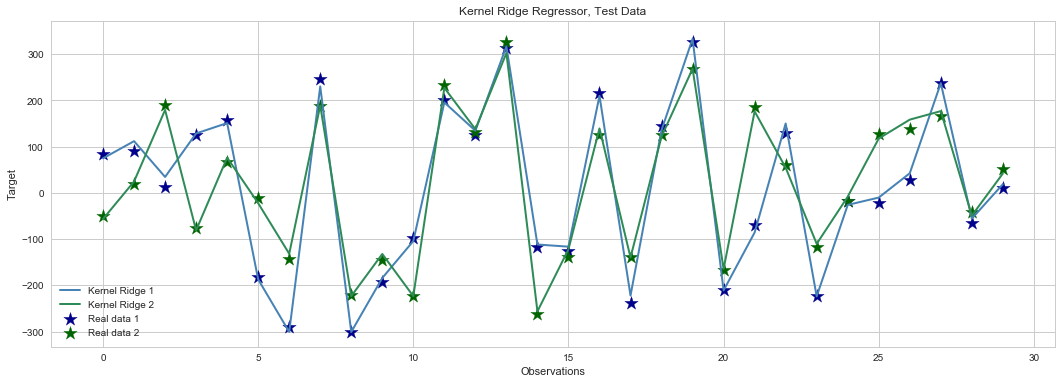

In [158]:
plt.figure(figsize=(18,6))
n=30
x=range(n)

plt.scatter(x, y_test7[:n, 0], marker='*', s=200, color='darkblue', label='Real data 1')
plt.scatter(x, y_test7[:n, 1], marker='*', s=200, color='darkgreen', label='Real data 2')

plt.plot(x, y_kr_test714[:n, 0], lw=2, color='steelblue', label='Kernel Ridge 1')
plt.plot(x, y_kr_test714[:n, 1], lw=2, color='seagreen', label='Kernel Ridge 2')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Kernel Ridge Regressor, Test Data')
plt.legend(loc=3);

In [159]:
reg14.score(X_test7, y_test7)

0.9966

### *Isotonic Regression & Dummy Regressor*

In [67]:
reg26 = IsotonicRegression()
reg27 = dummy.DummyRegressor(strategy='quantile', quantile = 0.75)

y_ir_test126 = reg26.fit_transform(np.arange(102), y_test1)

reg27.fit(X_train1, y_train1)
y_dr_test127 = reg27.predict(X_test1)

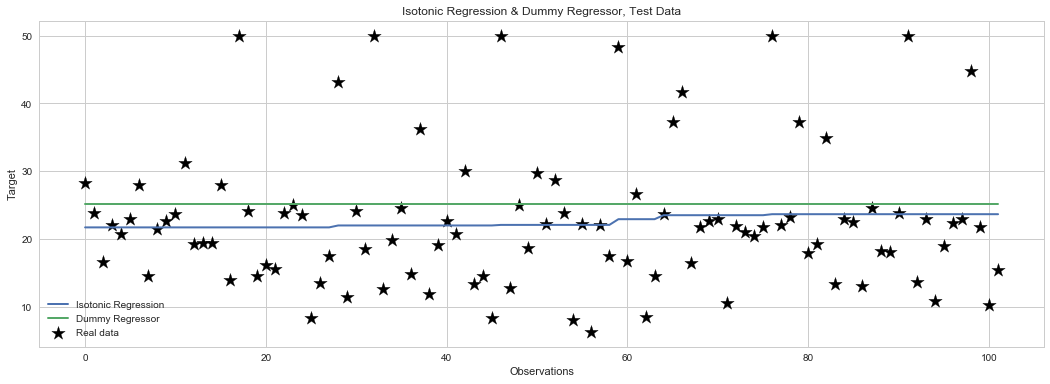

In [68]:
plt.figure(figsize=(18,6))
n=102
x=range(n)

plt.scatter(x, y_test1[:n], marker='*', s=200, color='black', label='Real data')

plt.plot(x, y_ir_test126[:n], lw=2, label='Isotonic Regression')
plt.plot(x, y_dr_test127[:n], lw=2, label='Dummy Regressor')

plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Isotonic Regression & Dummy Regressor, Test Data')
plt.legend(loc=3);

---
# 4. Unsupervised learning

In [106]:
# Gaussian mixture models
usl1 = mixture.GaussianMixture(n_components=4, n_init=4)
usl2 = mixture.BayesianGaussianMixture(n_components=4, n_init=4)

In [107]:
usl1.fit(X_train5, y_train5)
y_gmc_test51 = usl1.predict(X_test5)
usl2.fit(X_train5, y_train5)
y_bgmc_test52 = usl2.predict(X_test5)

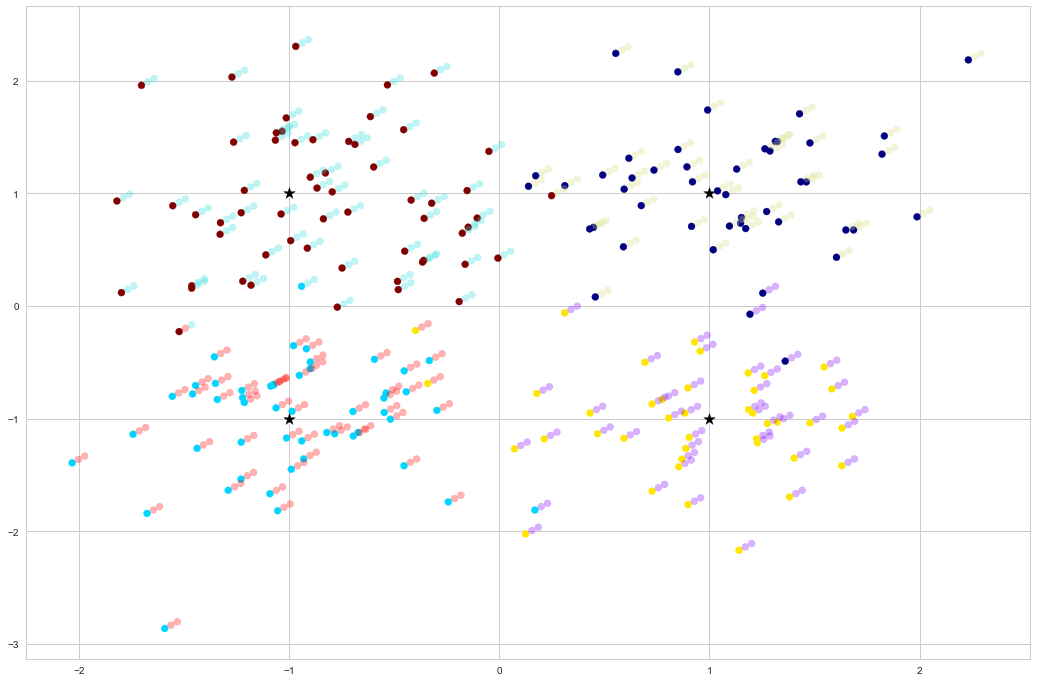

In [108]:
plt.figure(figsize=(18,12))
plt.scatter(X_test5[:, 0], X_test5[:, 1], c=y_test5, cmap=cm.jet)

plt.scatter(X_test5[:, 0]+0.03, X_test5[:, 1]+0.03, c=y_gmc_test51, alpha=0.3, cmap=cm.rainbow)
plt.scatter(X_test5[:, 0]+0.06, X_test5[:, 1]+0.06, c=y_bgmc_test52, alpha=0.3, cmap=cm.rainbow)

plt.scatter([1,-1,1,-1], [1,-1,-1,1], c='black', marker='*', s=150);

In [109]:
# Manifold learning
usl3 = manifold.Isomap()
usl4 = manifold.LocallyLinearEmbedding()

In [110]:
usl3.fit(X_train5, y_train5)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

In [111]:
usl4.fit(X_train5, y_train5)

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=2,
            n_jobs=1, n_neighbors=5, neighbors_algorithm='auto',
            random_state=None, reg=0.001, tol=1e-06)

In [120]:
usl5 = manifold.SpectralEmbedding()
usl6 = manifold.MDS()

In [121]:
usl7 = manifold.TSNE()

In [ ]:
# Clustering


In [ ]:
# Biclustering


---
# 5. Neural network models

## 5.1 Supervised

In [363]:
# Multi-layer Perceptron; Classifier
nn_clf1 = MLPClassifier(hidden_layer_sizes=(512,), max_iter=70, solver='sgd',
                        verbose=0, random_state=1, learning_rate_init=.01)
nn_clf1.fit(X_train3, y_train3);

In [364]:
nn_clf1.score(X_train3, y_train3)

1

In [365]:
nn_clf1.score(X_test3, y_test3)

0.9889

In [242]:
# Multi-layer Perceptron; Regressor
nn_reg1 = MLPRegressor(hidden_layer_sizes=(104,), max_iter=1000, solver='lbfgs', alpha=0.015)

nn_reg1.fit(X_train1, y_train1);

In [243]:
nn_reg1.score(X_train1, y_train1)

0.8713

In [244]:
nn_reg1.score(X_test1, y_test1)

0.8982

In [245]:
y_mlpr_test11 = nn_reg1.predict(X_test1)

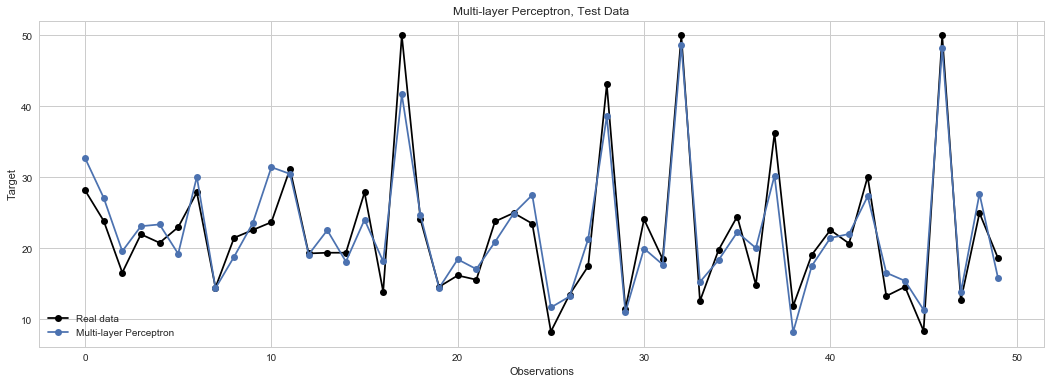

In [268]:
plt.figure(figsize=(18,6))
n=50
x=range(n)

plt.plot(x, y_test1[:n], '-o', color='black', label='Real data')

plt.plot(x, y_mlpr_test11[:n], '-o', label='Multi-layer Perceptron')


plt.xlabel('Observations')
plt.ylabel('Target')
plt.title('Multi-layer Perceptron, Test Data')
plt.legend(loc=3);

## 5.2 Unsupervised

In [366]:
# Restricted Boltzmann machines
X_train3_scaled = (X_train3 - np.min(X_train3, 0)) / (np.max(X_train3, 0) + 0.0001)
X_test3_scaled = (X_test3 - np.min(X_test3, 0)) / (np.max(X_test3, 0) + 0.0001)

logistic = linear_model.LogisticRegression()
logistic.C = 3000.0

brbm = BernoulliRBM(random_state=0, verbose=False)
brbm.learning_rate, brbm.n_iter, brbm.n_components = 0.05, 30, 64

nn_clf2 = Pipeline(steps=[('brbm', brbm), ('logistic', logistic)])

In [367]:
nn_clf2.fit(X_train3_scaled, y_train3)

Pipeline(steps=[('brbm', BernoulliRBM(batch_size=10, learning_rate=0.05, n_components=64, n_iter=30,
       random_state=0, verbose=False)), ('logistic', LogisticRegression(C=3000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [368]:
print("Logistic regression using BRBM features:\n%s\n" % \
      (classification_report(y_test3, nn_clf2.predict(X_test3_scaled))))

Logistic regression using BRBM features:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       1.00      1.00      1.00        35
          2       0.97      1.00      0.99        36
          3       0.93      0.95      0.94        41
          4       0.97      1.00      0.99        38
          5       0.93      0.90      0.92        30
          6       1.00      1.00      1.00        37
          7       1.00      0.92      0.96        37
          8       0.93      0.90      0.91        29
          9       0.89      0.97      0.93        34

avg / total       0.96      0.96      0.96       360


